In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\vbish\Downloads\IMDb Movies India.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(11933, 10)

In [5]:
df.isnull().sum()

Name           0
Year         354
Duration    6412
Genre       1418
Rating      5826
Votes       5825
Director     429
Actor 1     1253
Actor 2     1820
Actor 3     2425
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11933 non-null  object 
 1   Year      11579 non-null  object 
 2   Duration  5521 non-null   object 
 3   Genre     10515 non-null  object 
 4   Rating    6107 non-null   float64
 5   Votes     6108 non-null   object 
 6   Director  11504 non-null  object 
 7   Actor 1   10680 non-null  object 
 8   Actor 2   10113 non-null  object 
 9   Actor 3   9508 non-null   object 
dtypes: float64(1), object(9)
memory usage: 932.4+ KB


In [7]:
df.describe()

,Rating
count,6107.000000
mean,5.826265
std,1.378847
min,1.400000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [9]:
df.isnull().sum()

Name           0
Year         354
Duration    6412
Genre       1418
Rating      5826
Votes       5825
Director     429
Actor 1     1253
Actor 2     1820
Actor 3     2425
dtype: int64

In [10]:
df.dropna(subset=['Rating'], inplace=True)

In [11]:
df.isnull().sum()

Name           0
Year           0
Duration    1610
Genre         80
Rating         0
Votes          0
Director       3
Actor 1       97
Actor 2      147
Actor 3      225
dtype: int64

In [12]:
df['Genre'].fillna('Unknown', inplace=True)

In [13]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
df.isnull().sum()

Name           0
Year           0
Duration    1610
Genre          0
Rating         0
Votes          0
Director       3
Actor 1       97
Actor 2      147
Actor 3      225
dtype: int64

In [15]:
# Extract numeric values from 'Duration' and convert to integers
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

In [16]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [18]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      3
Actor 1      97
Actor 2     147
Actor 3     225
dtype: int64

In [20]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [21]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
#checking for data types
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [24]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)

In [25]:
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

In [26]:
df.dtypes

Name         object
Year          int64
Duration    float64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [27]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


mean year: 1992.6499489969399
mean votes: 103.61390683441006


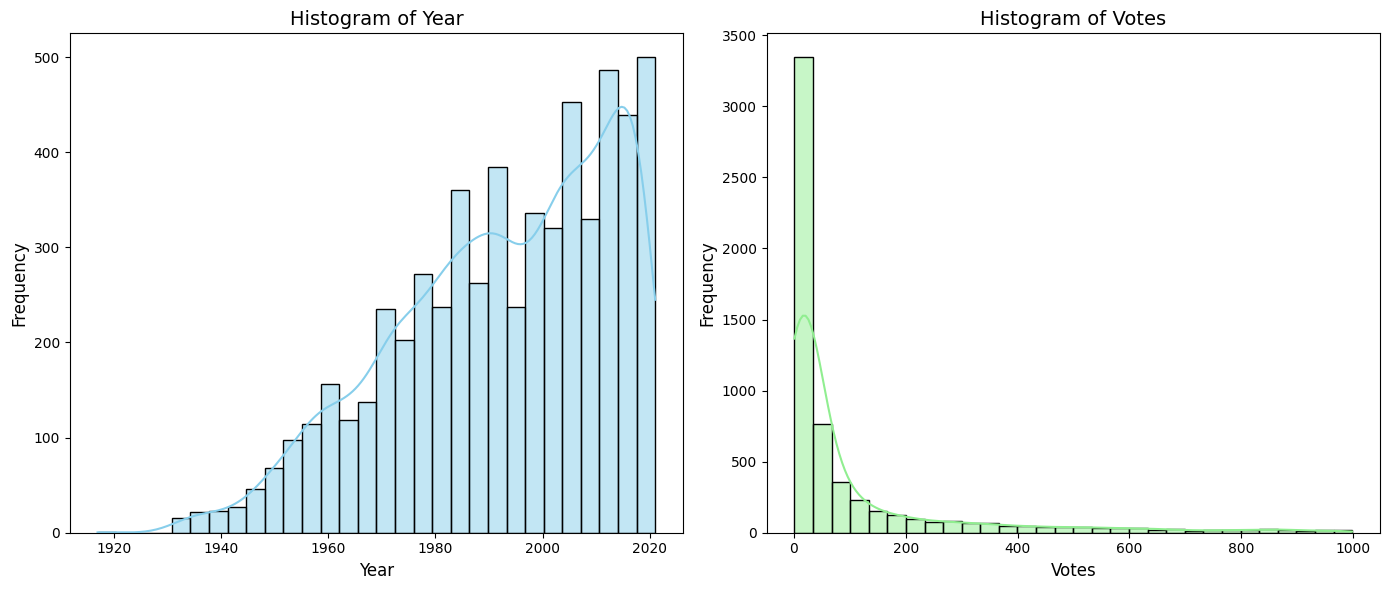

In [28]:
plt.figure(figsize=(14, 6))

# Plotting for 'Year' column
plt.subplot(1, 2, 1)
sns.histplot(df['Year'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
print('mean year:', df['Year'].mean())

# Plotting for 'Votes' column
plt.subplot(1, 2, 2)
sns.histplot(df['Votes'], kde=True, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Votes', fontsize=14)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
print('mean votes:', df['Votes'].mean())

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [29]:
skewness_year = df['Year'].skew()
print(f"Skewness of 'Year': {skewness_year}")

# Calculate skewness for the 'Votes' column (if needed)
skewness_votes = df['Votes'].skew()
print(f"Skewness of 'Votes': {skewness_votes}")

Skewness of 'Year': -0.5935813648954597
Skewness of 'Votes': 2.6801796796076958


For both Year and Votes, IQR would be the better method for detecting and removing outliers, given their skewed distributions.

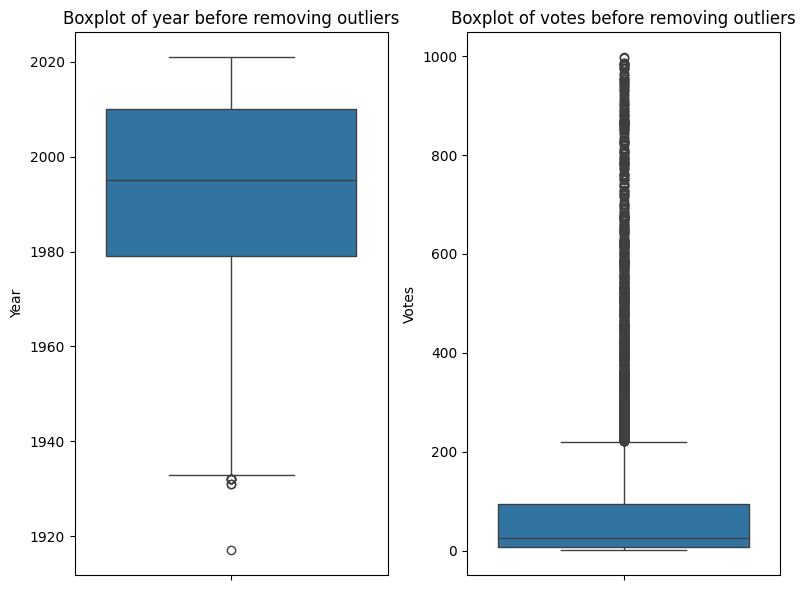

Number of rows with outliers for either Year or Votes: 848


In [30]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(df['Year'], ax=axs[0])
axs[0].set_title('Boxplot of year before removing outliers')
sns.boxplot(df['Votes'], ax=axs[1])
axs[1].set_title('Boxplot of votes before removing outliers')
plt.tight_layout()
plt.show()

#Finding outliers for the column 'Year'
Q1_year = df['Year'].quantile(0.25)
Q3_year = df['Year'].quantile(0.75)
IQR_year = Q3_year - Q1_year
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year
outliers_year = df[(df['Year'] < lower_bound_year) | (df['Year'] > upper_bound_year)]

#Finding outliers for the column 'Votes'
Q1_votes = df['Votes'].quantile(0.25)
Q3_votes = df['Votes'].quantile(0.75)
IQR_votes = Q3_votes - Q1_votes
lower_bound_votes = Q1_votes - 1.5 * IQR_votes
upper_bound_votes = Q3_votes + 1.5 * IQR_votes
outliers_votes = df[(df['Votes'] < lower_bound_votes) | (df['Votes'] > upper_bound_votes)]

combined_outliers = pd.concat([outliers_year, outliers_votes]).drop_duplicates()

# Print the number of rows with outliers in either Year or Votes
print('Number of rows with outliers for either Year or Votes:', len(combined_outliers))

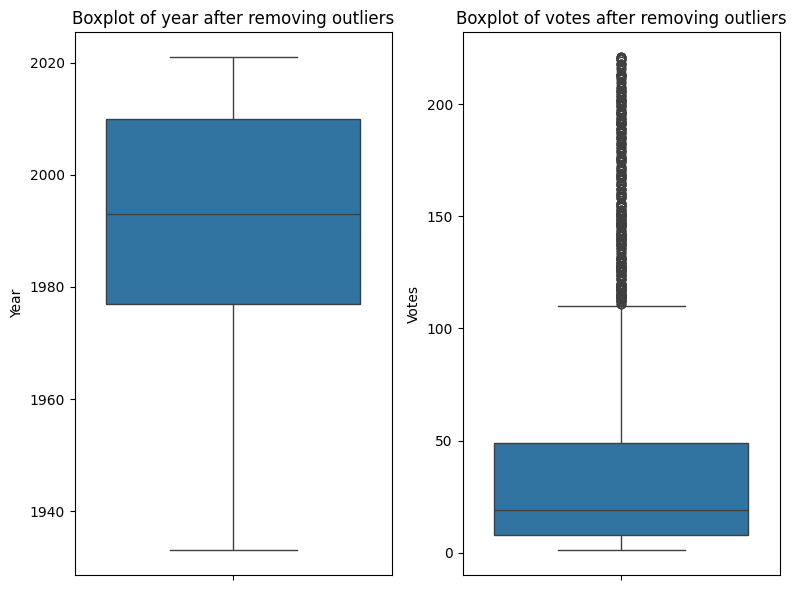

Number of rows after removing outliers: 5034


In [31]:
df_cleaned_year = df[(df['Year'] >= lower_bound_year) & (df['Year'] <= upper_bound_year)]

# Remove outliers for 'Votes' using IQR method
df_cleaned_votes = df_cleaned_year[(df_cleaned_year['Votes'] >= lower_bound_votes) & (df_cleaned_year['Votes'] <= upper_bound_votes)]

# Final cleaned dataset after removing outliers
df_final = df_cleaned_votes

fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(df_final['Year'], ax=axs[0])
axs[0].set_title('Boxplot of year after removing outliers')
sns.boxplot(df_final['Votes'], ax=axs[1])
axs[1].set_title('Boxplot of votes after removing outliers')
plt.tight_layout()
plt.show()
print("Number of rows after removing outliers:", len(df_final))

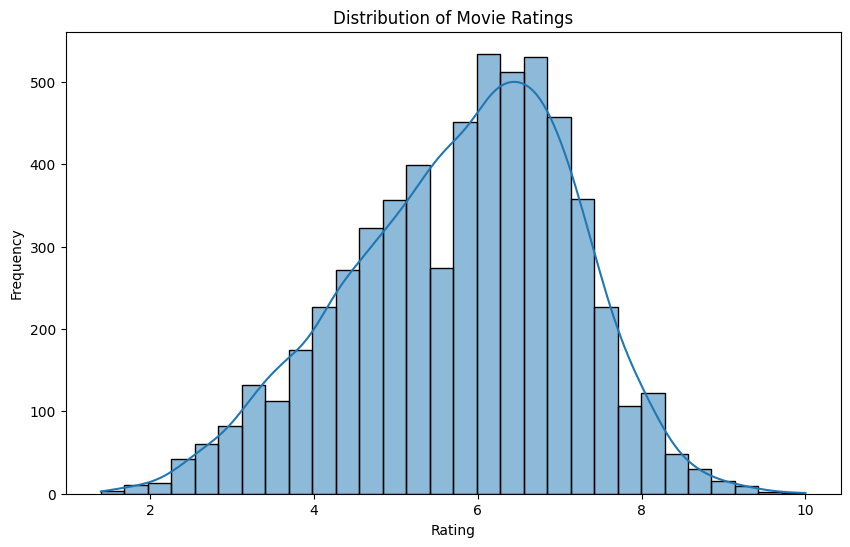

In [32]:
# Rating Analysis(Univariate analysis)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Inferences:
1) Rating Distribution: The histogram shows a slightly normal distribution with a peak around a 7 rating value.
2) Common Rating Range falls between 5 to 7.
3) There are few movies rated below 2 and above 8.

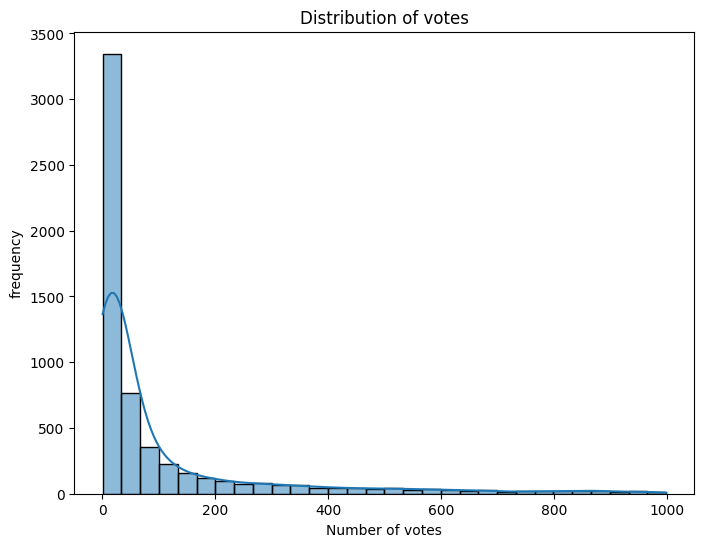

In [33]:
#Votes Analysis(Univariate analysis)
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of votes')
plt.xlabel('Number of votes')
plt.ylabel('frequency')
plt.show()

1) The distribution of votes is right-skewed, with the majority of movies receiving a relatively low number of votes. This suggests that many movies in    the dataset may not be widely recognized or popular, as they have received fewer votes.
3) The long tail towards higher vote counts indicates that there are a smaller number of movies that have garnered a significant number of votes.
4) Popularity Range is between 0 and 50.

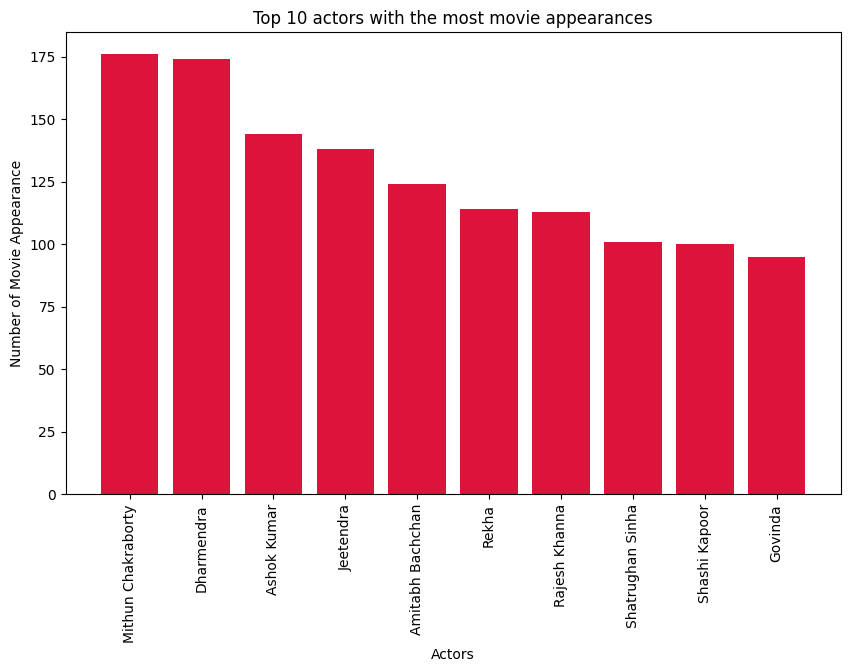

In [34]:
#Top 10 actors(Univariate analysis)
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
top_10_actors = actor_counts.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_actors.index, top_10_actors.values, color='crimson')
plt.title('Top 10 actors with the most movie appearances')
plt.xlabel('Actors')
plt.ylabel('Number of Movie Appearance')
plt.xticks(rotation=90)
plt.show()

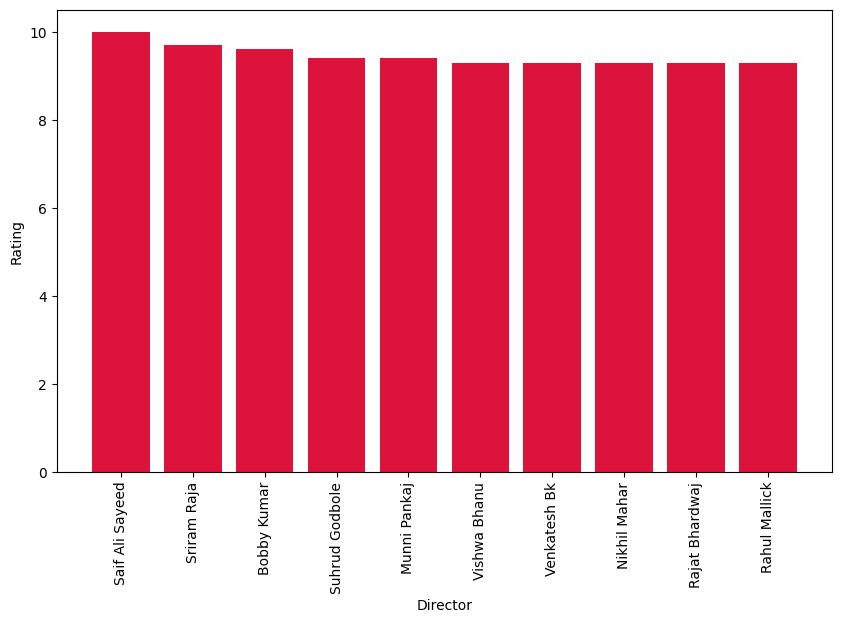

In [35]:
#Bivariate analysis
#Which directors have the most successful movies (in terms of high ratings)?
director_highest_rating = df.groupby('Director')['Rating'].max()
top_10_directors = director_highest_rating.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_directors.index, top_10_directors.values, color='crimson')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

Saif Ali Sayeed has directed the most succcessful Movies among other directors.This shows that the likelyhood of a movie to be rated high if directed by him is high.

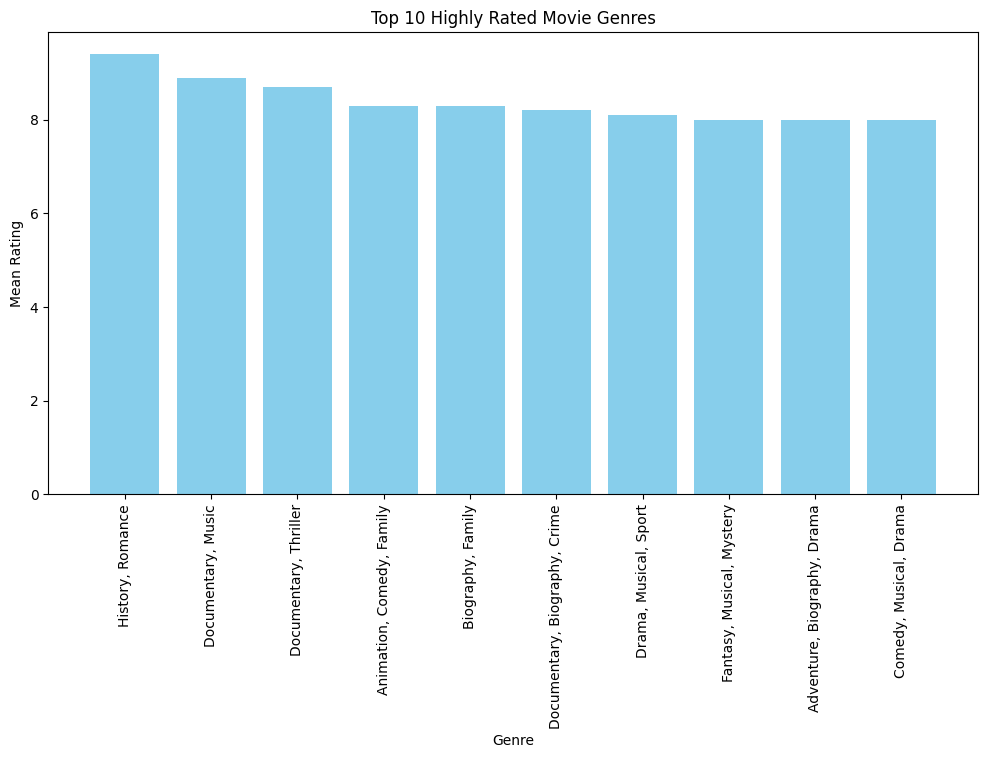

In [36]:
#Top 10 Highly Rated Movie Genres
# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

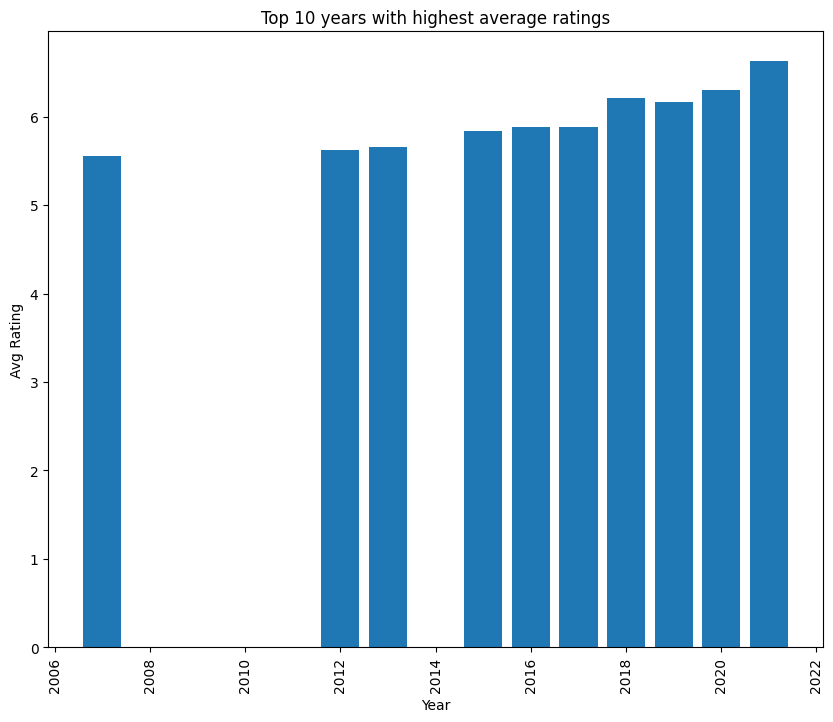

In [37]:
#Top 10 years with highest average ratings
recent_years = df[df['Year'] >= (max(df['Year']) - 19)]
avg_ratings = recent_years.groupby('Year')['Rating'].mean()
top_10_years = avg_ratings.sort_values(ascending=False).head(10)
#bar graph
plt.figure(figsize=(10,8))
plt.bar(top_10_years.index, top_10_years.values)
plt.xlabel('Year')
plt.ylabel('Avg Rating')
plt.title('Top 10 years with highest average ratings')
plt.xticks(rotation=90)
plt.show()

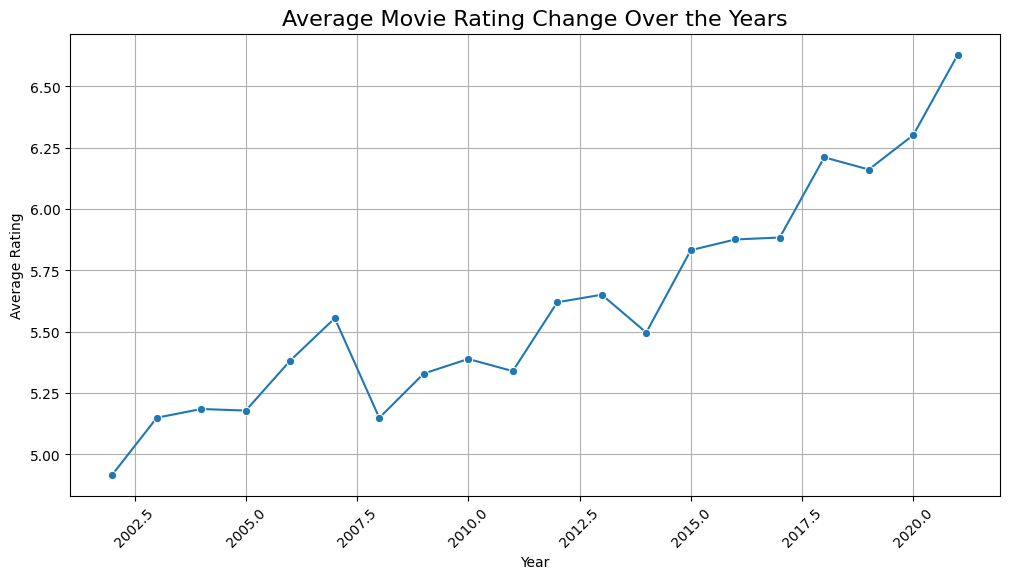

In [38]:
#Average Movie Rating Change Over the Years (Line Plot)
recent_years = df[df['Year'] >= (max(df['Year']) - 19)]
avg_rating_per_year = recent_years.groupby('Year')['Rating'].mean().reset_index()

# Plot the change in average rating over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rating_per_year, x='Year', y='Rating', marker='o')
plt.title('Average Movie Rating Change Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

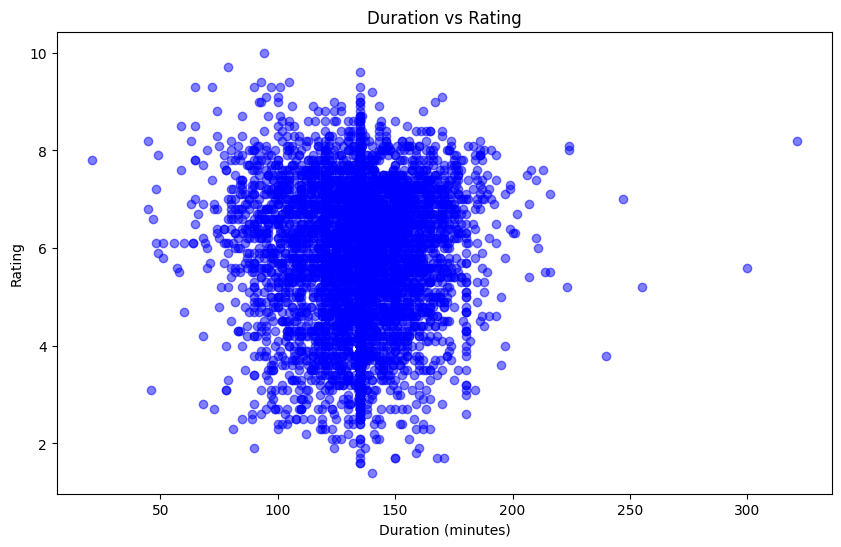

In [39]:
#Duration Vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.5, color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Duration vs Rating')
plt.show()

In [40]:
df.dtypes

Name         object
Year          int64
Duration    float64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

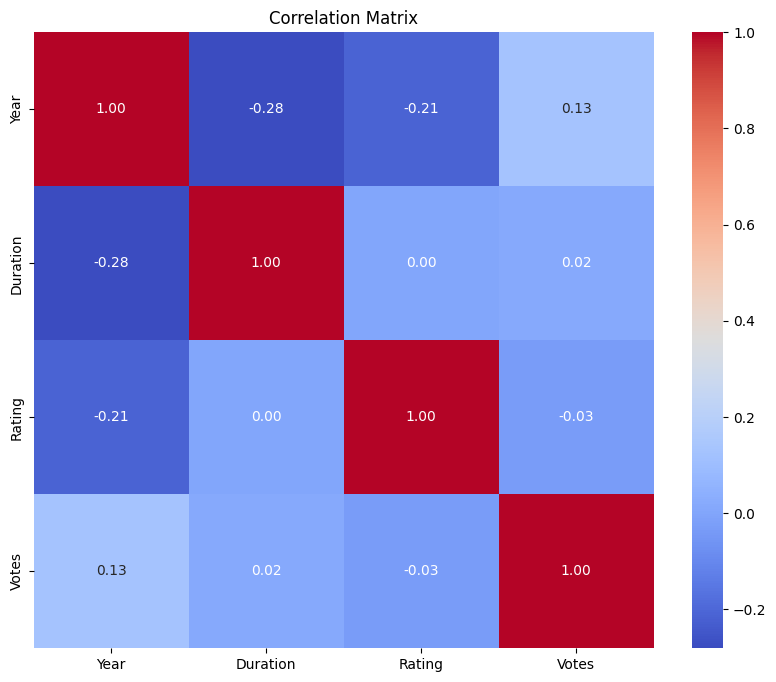

In [41]:
#Multivariate analysis
#Correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The variables are not Highly correlated. The absence of strong correlations between numerical variables is a positive sign, as it reduces the risk of multicollinearity in regression analysis

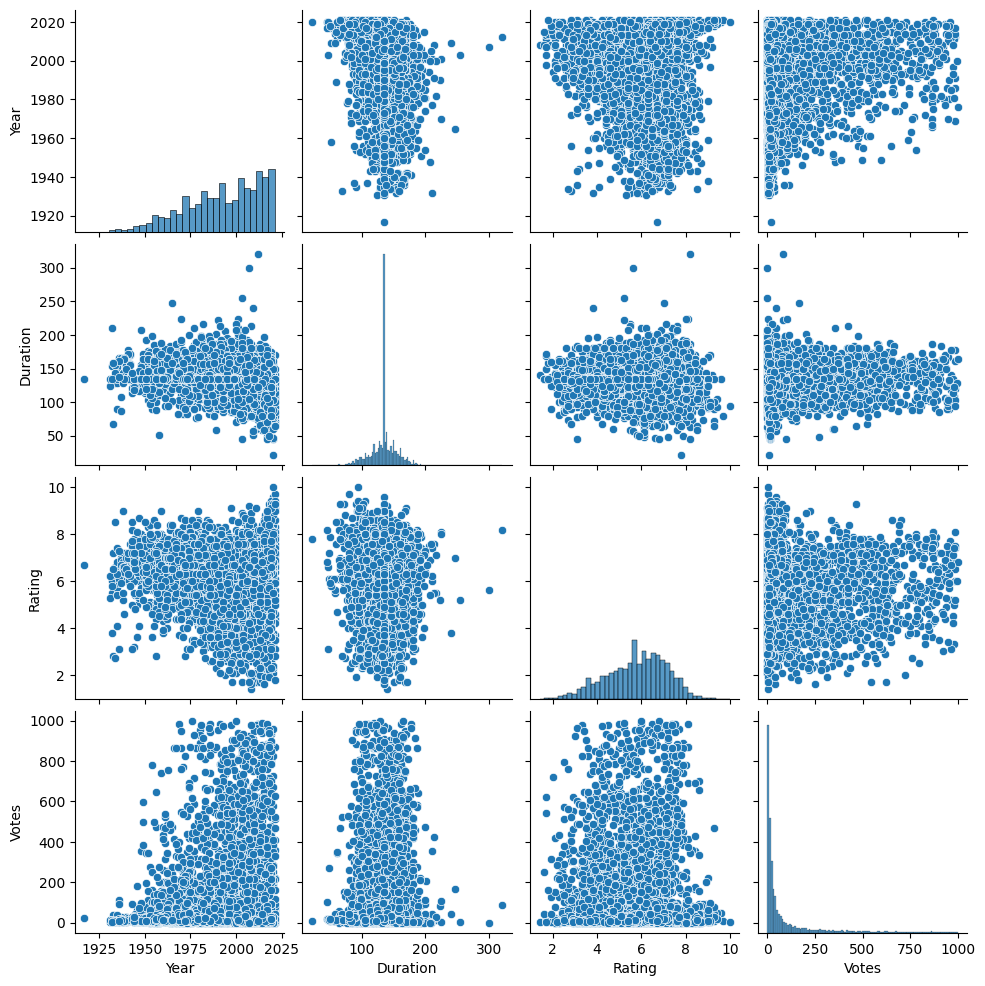

In [42]:
#Pairplot
#Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])

#Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()

No strong correlation between variables

In [43]:
###DATA PREPROCESSING
#Assigning Y/ target variable to Rating column for prediction analysis and the rest of the features to independent variable
X = df.drop('Rating', axis=1)
y = df['Rating']

In [44]:
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [45]:
#Check for mutlicollinearity X
numerical_columns = X.select_dtypes(include=['number'])
numerical_columns.corr()

,Year,Duration,Votes
Year,1.000000,-0.280913,0.128850
Duration,-0.280913,1.000000,0.018079
Votes,0.128850,0.018079,1.000000


In [46]:
#Converting categorical columns(nominal data) to binary format by One-Hot Encode
# Specify the categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])

# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_...Aur Pyaar Ho Gaya,Name_...Yahaan,Name_100 Days,Name_100% Love,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,...,Actor 3_Zarina Wahab,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Scaling numerical features
numerical_columns = ['Year', 'Duration', 'Votes']
scaler = MinMaxScaler()
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)
X_numeric_scaled_df.head()

,Year,Duration,Votes
0,0.980769,0.293333,0.007021
1,0.980769,0.296667,0.034102
2,0.769231,0.420000,0.828485
3,0.846154,0.403333,0.000000
4,0.913462,0.203333,0.325978


In [48]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_...Aur Pyaar Ho Gaya,Name_...Yahaan,Name_100 Days,Name_100% Love,...,Actor 3_Zarina Wahab,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.980769,0.293333,0.007021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.980769,0.296667,0.034102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.769231,0.420000,0.828485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.846154,0.403333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.913462,0.203333,0.325978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_final.shape

(5882, 15131)

In [50]:
#Scaling Y
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.651163
1,0.348837
2,0.383721
3,0.697674
4,0.488372
...,...
5877,0.651163
5878,0.627907
5879,0.616279
5880,0.372093


In [51]:
#Train-Test Split
# Split the data into training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [52]:
#Baseline Model
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

#Fitting the model on the training data
lr_model.fit(X_train, y_train)

#make prediction on the test data
y_pred_test = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [53]:
#Baseline Model evaluation
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Test Mean Squared Error : {mse_test}")
print(f"Test R-Squared(R^2) Score : {r2_test}")
print(f"Train Mean Squared Error : {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Test Mean Squared Error : 0.02145327227482064
Test R-Squared(R^2) Score : 0.12778047088417221
Train Mean Squared Error : 1.178473941362123e-29
Train R-squared (R^2) Score: 1.0


The Test MSE (0.0215) is small, indicating predictions are close to actual values, but the Test R² (0.1278) is low, meaning the model explains only 12.78% of the variance in the test data, suggesting poor generalization. The Train MSE (1.18e-29) and Train R² (1.0) indicate perfect fit on training data, but this overfitting leads to poor performance on the test set. The model needs improvement, possibly through better feature selection or more complex models.

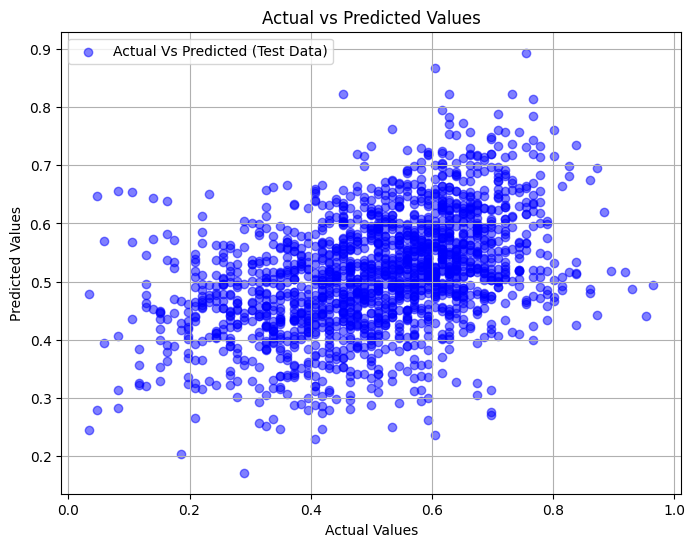

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Actual Vs Predicted (Test Data)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot likely shows a scattered pattern of points away from the diagonal line, which aligns with the negative Test R^2 and non-ideal Test MSE. These results collectively suggest that the Linear Regression model is not a good fit for predicting movie ratings and may require improvement, such as exploring more complex models or refining feature selection and engineering.

In [55]:
#Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
#fit the model on the training data
rf_model.fit(X_train, y_train)
#prediction on the the test data
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [56]:
#Random Forest Model Evaluation
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Test Mean Squared Error : {mse_test}")
print(f"Test R-Squared (R^2) Score : {r2_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Test Mean Squared Error : 0.01832215393206955
Test R-Squared (R^2) Score : 0.2550814500324975
Train Mean Squared Error: 0.0025254329356059453
Train R-squared (R^2) Score: 0.9004578537645144


The Random Forest model demonstrates significant improvements from the baseline model. It achieves a considerably lower Test MSE of 0.0183 and a positive Test R-squared score , indicating more accurate predictions and a much better fit to the test data. The Random Forest model also maintains a strong performance on the training data with a Train R-squared (Train R^2) score of 0.900, suggesting that it avoids overfitting.

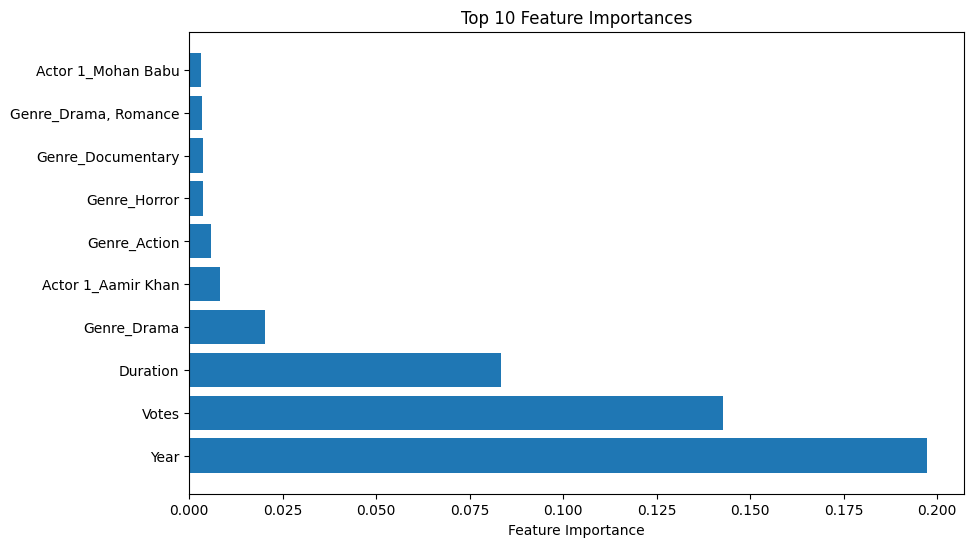

In [57]:
# Get feature importance
feature_importances = rf_model.feature_importances_

# Get the column names of your feature data 
feature_names = X_final.columns 
# Sort feature importances in descending order and get the top 10 features
top_indices = np.argsort(feature_importances)[::-1][:10]
top_features = [feature_names[i] for i in top_indices]
top_importances = [feature_importances[i] for i in top_indices]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_importances, align='center')
plt.yticks(range(10), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()

Features that had most significant impact on the target variable:
1) Year
2) Votes
3) Duration